<a href="https://colab.research.google.com/github/DJCordhose/transformers/blob/main/notebooks/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wahrscheinlichkeitsverteilungen, Temperatur und Top P

https://chat.openai.com/c/95dc4bc4-ef86-4a8d-81df-9a908f80cb36

In [1]:
import numpy as np

# Temperatures to illustrate
temperatures = [0.01, 0.5, 1, 2]

# Defining a sample probability distribution (for demonstration)
probabilities = np.array([0.4, 0.2, 0.15, 0.12, 0.08, 0.05])
assert np.sum(probabilities) == 1

# Function to apply temperature to the probability distribution
def apply_temperature(probs, temperature):
    adjusted_probs = np.power(probs, 1 / temperature)
    adjusted_probs /= np.sum(adjusted_probs)
    return adjusted_probs


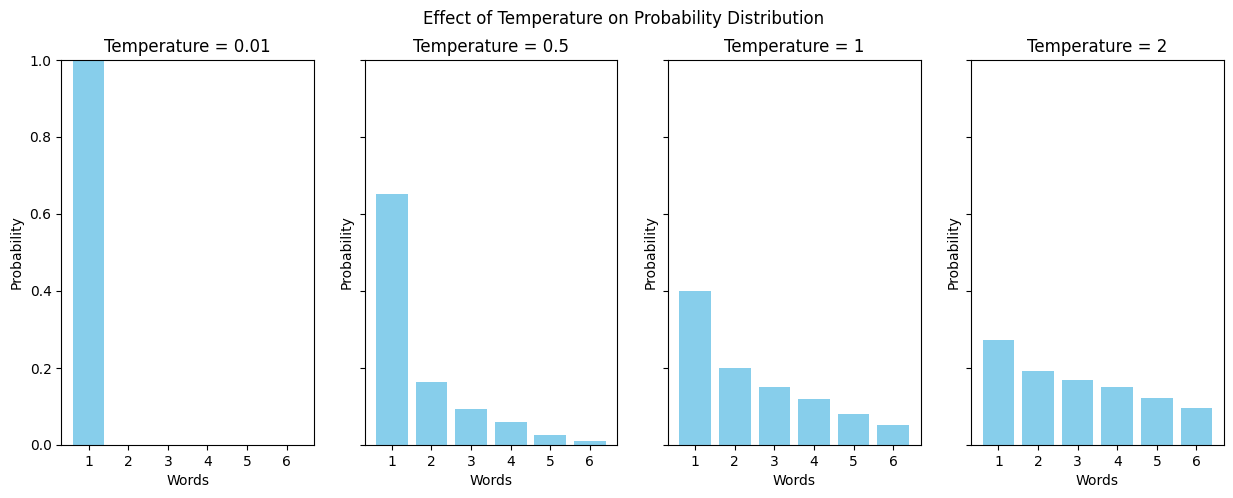

In [2]:
import matplotlib.pyplot as plt

words = np.array(['1', '2', '3', '4', '5', '6'])

# Creating subplots
fig, axs = plt.subplots(1, len(temperatures), figsize=(15, 5), sharey=True)

for i, temp in enumerate(temperatures):
    adjusted_probs = apply_temperature(probabilities, temp)
    axs[i].bar(words, adjusted_probs, color='skyblue')
    axs[i].set_title(f'Temperature = {temp}')
    axs[i].set_xlabel('Words')
    axs[i].set_ylabel('Probability')
    axs[i].set_ylim(0, 1)

plt.suptitle('Effect of Temperature on Probability Distribution')
plt.show()

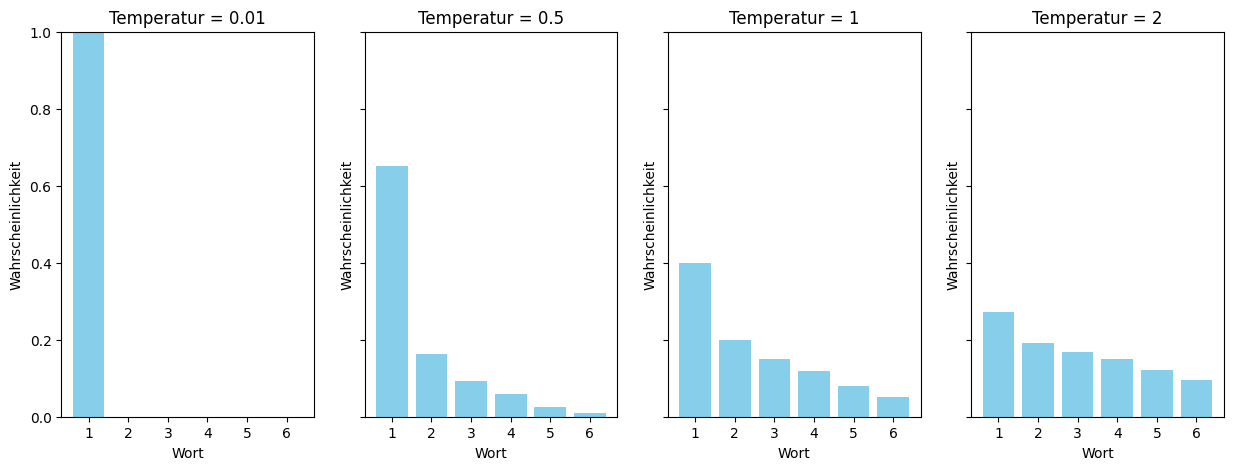

In [3]:
import numpy as np
import matplotlib.pyplot as plt

german_words = np.array(['1', '2', '3', '4', '5', '6'])
# x_label = 'Wort nach Wahrscheinlichkeit'
x_label = 'Wort'
y_label = 'Wahrscheinlichkeit'
title = 'Auswirkung der Temperatur auf die Wahrscheinlichkeitsverteilung'

# Creating subplots with German labels
fig, axs = plt.subplots(1, len(temperatures), figsize=(15, 5), sharey=True)

for i, temp in enumerate(temperatures):
    adjusted_probs = apply_temperature(probabilities, temp)
    axs[i].bar(german_words, adjusted_probs, color='skyblue')
    axs[i].set_title(f'Temperatur = {temp}')
    axs[i].set_xlabel(x_label)
    axs[i].set_ylabel(y_label)
    axs[i].set_ylim(0, 1)

# plt.suptitle(title)
plt.show()


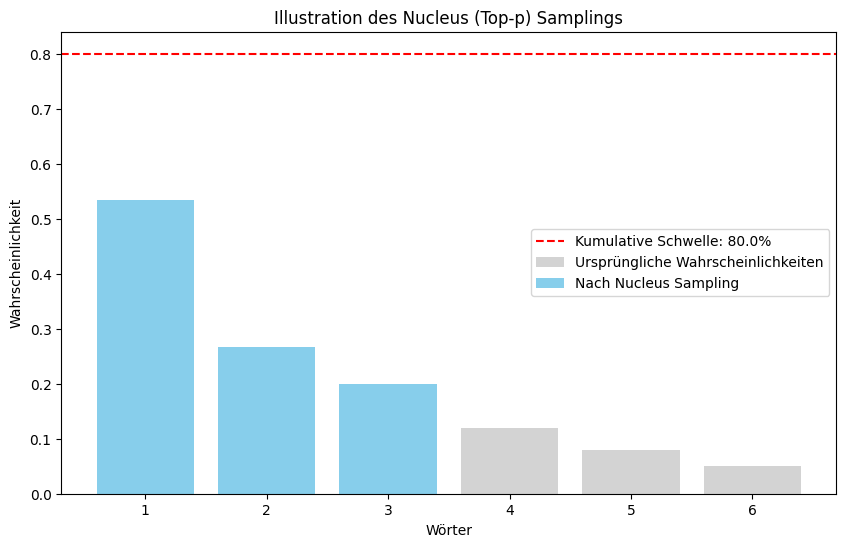

In [4]:
# Illustrating Nucleus (Top-p) Sampling

# Setting a cumulative probability threshold (p)
p_threshold = 0.8  # 80% cumulative probability

# Function to apply Nucleus Sampling
def apply_nucleus_sampling(probs, p):
    sorted_probs = np.sort(probs)[::-1]  # Sort probabilities in descending order
    cumulative_probs = np.cumsum(sorted_probs)
    # Find the index where the cumulative probability exceeds p
    cutoff_index = np.where(cumulative_probs >= p)[0][0]
    # Zero out probabilities beyond the cutoff index
    probs_cutoff = np.copy(sorted_probs)
    probs_cutoff[cutoff_index:] = 0
    # Normalize the modified probabilities
    probs_cutoff /= np.sum(probs_cutoff)
    return probs_cutoff

# Applying Nucleus Sampling to the example probabilities
nucleus_probs = apply_nucleus_sampling(probabilities, p_threshold)

# Creating a bar plot to illustrate the effect of Nucleus Sampling
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(german_words, probabilities, color='lightgrey', label='Ursprüngliche Wahrscheinlichkeiten')
ax.bar(german_words, nucleus_probs, color='skyblue', label='Nach Nucleus Sampling')
ax.axhline(y=p_threshold, color='red', linestyle='--', label=f'Kumulative Schwelle: {p_threshold * 100}%')
ax.set_xlabel('Wörter')
ax.set_ylabel('Wahrscheinlichkeit')
ax.set_title('Illustration des Nucleus (Top-p) Samplings')
ax.legend()

plt.show()


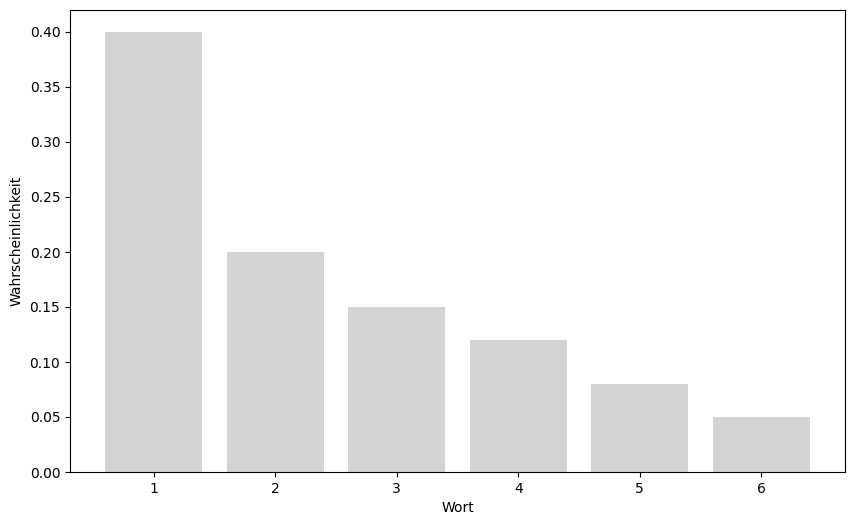

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(german_words, probabilities, color='lightgrey', label='Wahrscheinlichkeiten')
ax.set_xlabel('Wort')
ax.set_ylabel('Wahrscheinlichkeit')
# ax.set_title('Illustration des Nucleus (Top-p) Samplings')
# ax.legend()

plt.show()


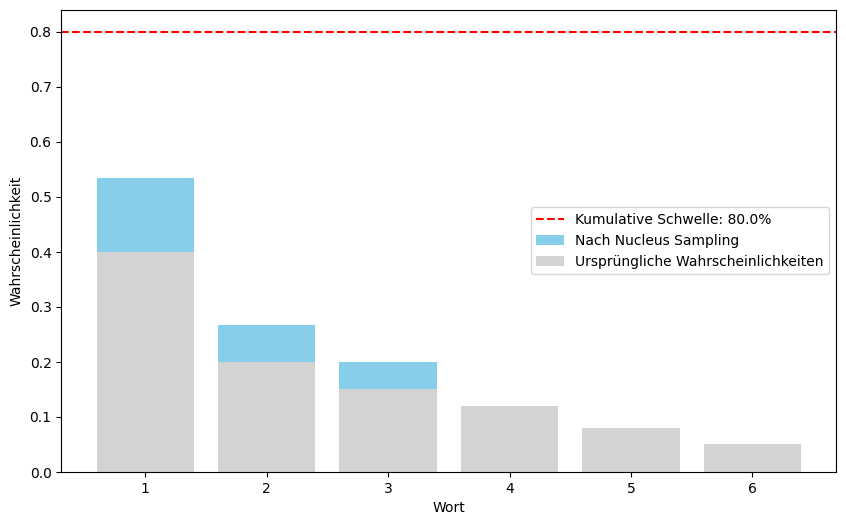

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(german_words, nucleus_probs, color='skyblue', label='Nach Nucleus Sampling')
ax.bar(german_words, probabilities, color='lightgrey', label='Ursprüngliche Wahrscheinlichkeiten')
ax.axhline(y=p_threshold, color='red', linestyle='--', label=f'Kumulative Schwelle: {p_threshold * 100}%')
ax.set_xlabel('Wort')
ax.set_ylabel('Wahrscheinlichkeit')
# ax.set_title('Illustration des Nucleus (Top-p) Samplings')
ax.legend()

plt.show()


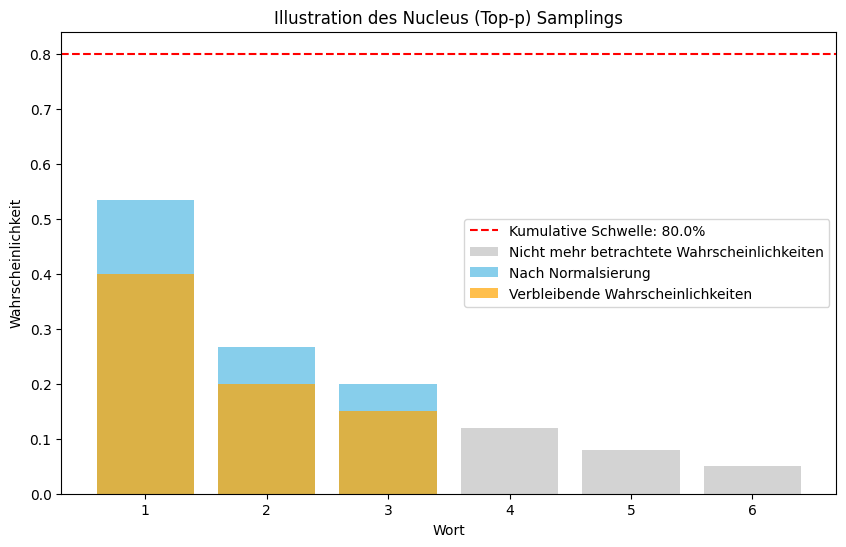

In [7]:
# Adjusting the plot to show probabilities of the remaining words before normalization

# Function to calculate the probabilities before normalization
def probs_before_normalization(probs, p):
    sorted_probs = np.sort(probs)[::-1]  # Sort probabilities in descending order
    cumulative_probs = np.cumsum(sorted_probs)
    # Find the index where the cumulative probability exceeds p
    cutoff_index = np.where(cumulative_probs >= p)[0][0]
    # Zero out probabilities beyond the cutoff index
    probs_before_norm = np.copy(sorted_probs)
    probs_before_norm[cutoff_index:] = 0
    return probs_before_norm

# Calculating the probabilities before normalization
probs_before_norm = probs_before_normalization(probabilities, p_threshold)

# Creating a bar plot to illustrate the effect of Nucleus Sampling
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(words, probabilities, color='lightgrey', label='Nicht mehr betrachtete Wahrscheinlichkeiten')
ax.bar(words, nucleus_probs, color='skyblue', label='Nach Normalsierung')
ax.bar(words, probs_before_norm, color='orange', label='Verbleibende Wahrscheinlichkeiten', alpha=0.7)
ax.axhline(y=p_threshold, color='red', linestyle='--', label=f'Kumulative Schwelle: {p_threshold * 100}%')
ax.set_xlabel('Wort')
ax.set_ylabel('Wahrscheinlichkeit')
ax.set_title('Illustration des Nucleus (Top-p) Samplings')
ax.legend()

plt.show()


In [8]:
assert np.sum(nucleus_probs) == 1

In [9]:
assert np.sum(probs_before_norm) <= p_threshold